In [35]:
#Import Dependencies
import csv
import matplotlib.pyplot as plt
import pprint
import json
import requests
import pandas as pd
import numpy as np
import gmaps
from config import gkey
from sklearn import datasets
import ipywidgets as widgets
#access gmaps with API key
gmaps.configure(api_key=gkey)
import gmaps.datasets

In [2]:
#Pull list from WeatherPY
%store -r place_location
%store -r place

In [30]:
#Rename random locations retrieved from WeatherPY
#Converted max_temp from Kelvin to Fahrenheit
place_df=pd.DataFrame(place)
renamed_df=place_df.rename(columns={0:"Name",1:"Latitude",2:"Longitude",3:"Humidity",4:"Max_Temp",5:"Windspeed",6:"Cloudiness"})
renamed_df["Max_Temp"]=(renamed_df["Max_Temp"]-273.15)*1.8+32
renamed_df

,Name,Latitude,Longitude,Humidity,Max_Temp,Windspeed,Cloudiness
0,Soron,27.88,78.75,81,80.402,4.57,31
1,Braniştea,44.68,25.58,53,82.004,3.10,0
2,Uren',57.46,45.79,93,59.342,3.61,100
3,Komsomolsk-on-Amur,50.55,137.02,93,48.182,1.58,6
4,Linda,39.13,-121.55,37,82.994,2.60,1
5,Bad Schwartau,53.92,10.70,77,64.004,1.00,6
6,Băseşti,47.48,23.15,69,73.400,3.60,0
7,Straubing,48.88,12.57,10,59.000,4.44,100
8,Gargunnock,56.12,-4.08,67,57.200,2.10,84
9,Maputo,-25.97,32.59,72,62.600,6.20,75


In [31]:
renamed_df.to_csv("random_locations_file.csv")

Text(24.125, 0.5, 'Temp by Degree')

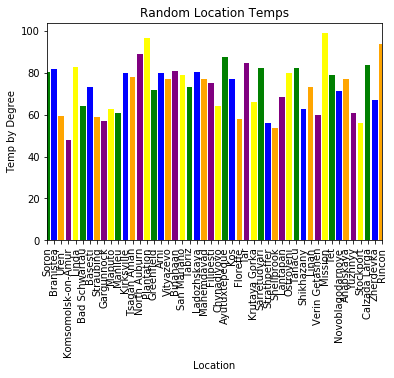

In [126]:
plt.bar(renamed_df["Name"],renamed_df["Max_Temp"],color=['green','blue','orange','purple','yellow'])
plt.xticks(rotation=90)
plt.xlim(0,47)
plt.Figure(figsize=(12,8))
plt.title("Random Location Temps",)
plt.savefig("random_location_compare.png")
plt.xlabel("Location")
plt.ylabel("Temp by Degree")

In [37]:
#Heatmap of all random locations weighted by max temp
locations=renamed_df[["Latitude","Longitude"]]
weights=renamed_df["Max_Temp"]
fig = gmaps.figure()
heat_layer=gmaps.heatmap_layer(locations,weights=weights)
fig.add_layer(heat_layer)
plt.savefig("heatmap.png")
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [25]:
#Define travel requirements
renamed_df=renamed_df.loc[renamed_df["Windspeed"]<10,:]
renamed_df=renamed_df.loc[renamed_df["Cloudiness"]==0,:]
renamed_df=renamed_df.loc[renamed_df["Max_Temp"]>62,:]
renamed_df=renamed_df.loc[renamed_df["Max_Temp"]<76,:]
renamed_df

,Name,Latitude,Longitude,Humidity,Max_Temp,Windspeed,Cloudiness
6,Băseşti,47.48,23.15,69,73.400,3.60,0
20,Tabriz,38.08,46.29,33,73.400,7.20,0
23,Filipeşti,46.75,26.88,60,75.200,4.60,0
24,Chynadiyovo,48.48,22.82,75,64.004,4.92,0
41,Novoblagodarnoye,44.14,42.88,43,71.600,3.00,0
46,Zherdevka,51.85,41.46,56,66.974,2.50,0


In [6]:
locations=renamed_df[["Latitude","Longitude"]]
location_list=locations.values.tolist()
location_list

[[47.48, 23.15],
 [38.08, 46.29],
 [46.75, 26.88],
 [48.48, 22.82],
 [44.14, 42.88],
 [51.85, 41.46]]

In [7]:
#Hotels within 5000km of the random locations identified to meet my travel requirments.
search_results=[]
url="https://maps.googleapis.com/maps/api/place/textsearch/json?query=lodging"
#name=request["results"][0]["name"]
for row in location_list:
    #print(row)
    request=requests.get(url+"&location="+str(row)+"&radius=5000&key="+gkey).json()
    search_results.append(request)
search_results_df=pd.DataFrame(search_results[0]["results"])
search_results_df["name"]

0                  US Hotel Ventures Co
1                                Homely
2                      Lodging Partners
3               The Lodge at Ballantyne
4                               Lodging
5     Evon Allen Hospitality Management
6              Charlotte Kennels Actual
7                           Holiday Inn
8                           Mike Morgan
9                    Hoiday Inn Express
10                       Brookshire Inn
11                        Fairfield Inn
12                                my bf
13                  300 Briar Ridge Dr.
14                             Mictotel
15                      Woodland hollow
16                       Auto zone 4858
17                           Kim's home
18               Comunidad Monroe 8 a 1
19                 Wade Arscott Lodging
Name: name, dtype: object